In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
train_dir=r'D:\Major Project Chandana\Major Project\Blood Sample Based\Blood Dataset\train'
test_dir=r'D:\Major Project Chandana\Major Project\Blood Sample Based\Blood Dataset\test'


In [3]:
batch_size = 1
epochs = 5
img_height = 224
img_width = 224

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 500 images belonging to 8 classes.


In [5]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 250 images belonging to 8 classes.


In [6]:
import warnings
 

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization


In [7]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import Sequential
from tensorflow.keras.applications import DenseNet121,MobileNet,ResNet50,DenseNet201
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2


In [8]:
base_model = MobileNetV2(weights = 'imagenet', include_top=False, input_shape=(224, 224, 3))


In [9]:
base_model.trainable = False

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D


In [12]:
from tensorflow.keras.models import load_model
model = load_model(r'D:\Major Project Chandana\Major Project\Blood Sample Based\bloodsample.h5')

In [12]:
model = tf.keras.models.Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(8, activation = 'softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        10,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,268,232 (8.65 MB)

 Trainable params: 10,248 (40.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
model.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_data_gen, epochs=20,
                 batch_size = 1,
 validation_data =val_data_gen )

c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.4693 - loss: 1.6305 - val_accuracy: 0.9640 - val_loss: 0.2736
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9872 - loss: 0.2300 - val_accuracy: 0.9960 - val_loss: 0.0962
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9923 - loss: 0.0894 - val_accuracy: 1.0000 - val_loss: 0.0461
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 1.0000 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0296
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 1.0000 - loss: 0.0266 - val_accuracy: 1.0000 - val_loss: 0.0179
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 1.0000 - loss: 0.0090 - 

In [14]:
import numpy as np





In [15]:
# Collect true labels
y = np.concatenate([val_data_gen[i][1] for i in range(len(val_data_gen))])
true_labels = np.argmax(y, axis=-1)

# Collect predictions
predictions = model.predict(val_data_gen, verbose=2)
predictions = np.argmax(predictions, axis=-1)


c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 - 13s - 52ms/step


In [16]:
import numpy as np





In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=predictions)

In [19]:
cm_plot_labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

Confusion matrix, without normalization
[[34  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0]
 [ 0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0 24]]
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F-Measure: 1.000


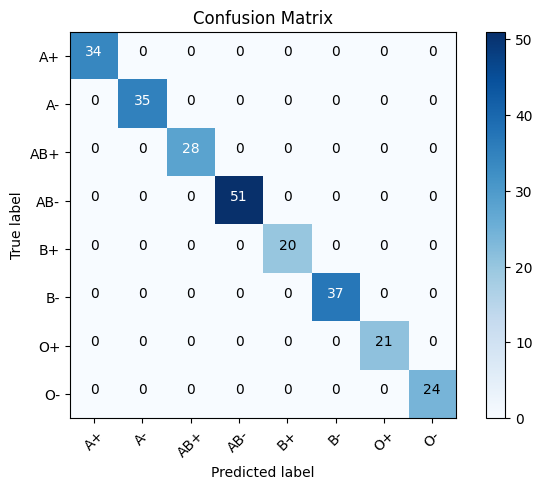

In [20]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,predictions) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,predictions,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,predictions, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,predictions, average='micro')
print('F-Measure: %.3f' % score)

In [22]:
model.save('bloodsample.h5')

In [23]:
results = model.evaluate(val_data_gen, verbose=0)

print("Test loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))




Test loss: 0.00029
Test Accuracy: 100.00%


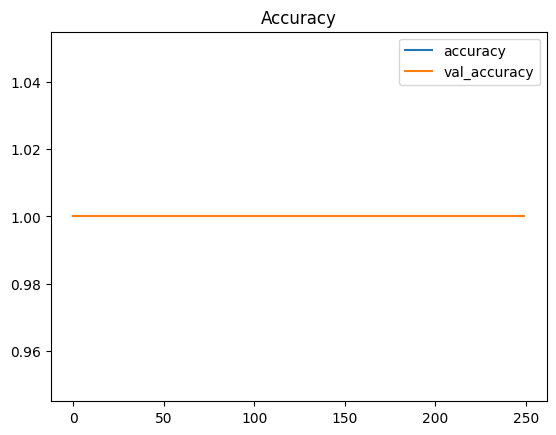

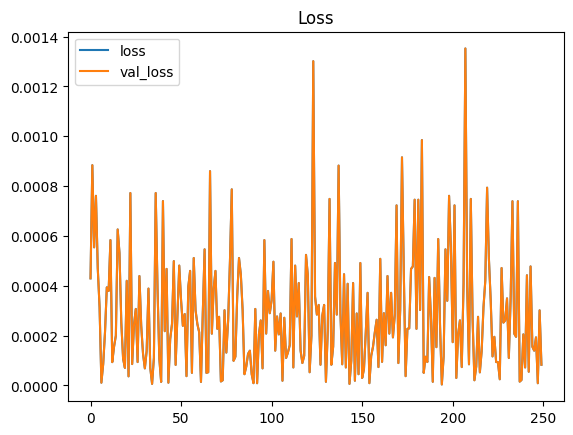

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store accuracy and loss
acc_list, val_acc_list, loss_list, val_loss_list = [], [], [], []

# Evaluate model in smaller batches to simulate epoch-like behavior
for X, y in val_data_gen:
    batch_loss, batch_accuracy = model.evaluate(X, y, verbose=0)
    loss_list.append(batch_loss)
    acc_list.append(batch_accuracy)

    # To simulate 'val_loss' and 'val_accuracy' trends, repeat as necessary or skip this part if not needed
    val_loss_list.append(batch_loss)
    val_acc_list.append(batch_accuracy)

    # Break if only running for one full epoch
    if len(acc_list) >= len(val_data_gen):
        break

# Create a DataFrame with these results
results_df = pd.DataFrame({
    'accuracy': acc_list,
    'val_accuracy': val_acc_list,
    'loss': loss_list,
    'val_loss': val_loss_list
})

# Plot the accuracy
results_df[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

# Plot the loss
results_df[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()


Unique true labels: {'B-', 'AB+', 'O-', 'A+', 'AB-', 'A-', 'B+', 'O+'}
250/250 - 12s - 50ms/step


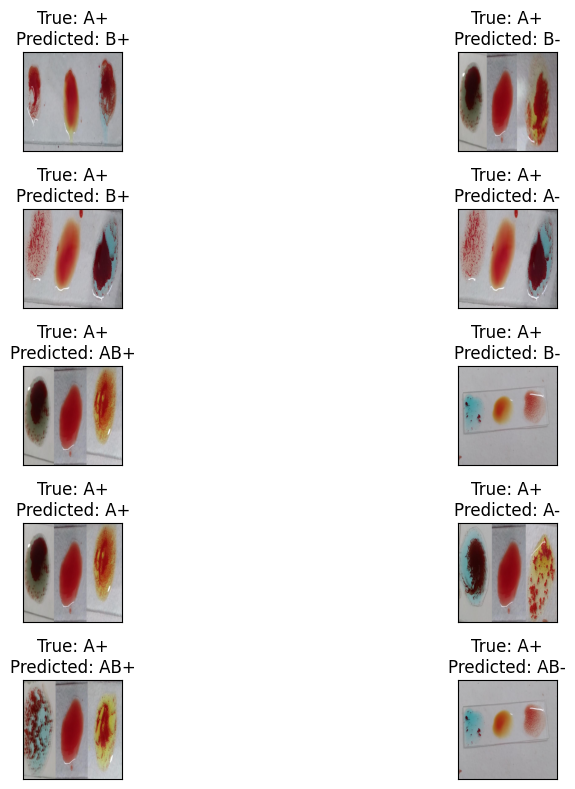

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming test_dir and cm_plot_labels are already defined
test_images = []
true_labels = []  # Ensure true_labels is defined to collect true labels

# Traverse through each subdirectory to gather images and true labels
for blood_group in os.listdir(test_dir):
    blood_group_path = os.path.join(test_dir, blood_group)
    if os.path.isdir(blood_group_path):  # Check if it's a directory
        for img_file in os.listdir(blood_group_path):
            if img_file.lower().endswith('.jpg'):
                test_images.append(os.path.join(blood_group_path, img_file))
                true_labels.append(blood_group)  # Add true label based on folder name

# Print unique true labels for debugging
print("Unique true labels:", set(true_labels))

# Convert true_labels to numerical indices based on cm_plot_labels
label_to_index = {label: index for index, label in enumerate(cm_plot_labels)}
true_labels_indices = [label_to_index.get(label, -1) for label in true_labels]  # Safely get indices

# Ensure predictions and true_labels match
predictions = model.predict(val_data_gen, verbose=2)
predictions = np.argmax(predictions, axis=-1)

# Check if predictions match the number of images
if len(true_labels_indices) != len(predictions):
    print(f"The number of true labels ({len(true_labels_indices)}) does not match the number of predictions ({len(predictions)}).")
else:
    # Limit to a maximum of 10 images
    num_images = min(10, len(test_images))
    
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                             subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        if i < num_images:  # Ensure we don't go out of bounds
            img_path = test_images[i]
            
            try:
                img = plt.imread(img_path)  # Read the .bmp image
                ax.imshow(img)
                # Use true_labels_indices directly since they should now match with predictions
                ax.set_title(f"True: {cm_plot_labels[true_labels_indices[i]]}\nPredicted: {cm_plot_labels[predictions[i]]}")
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                ax.set_title("Error loading image")
        else:
            ax.axis('off')  # Hide any unused subplots

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


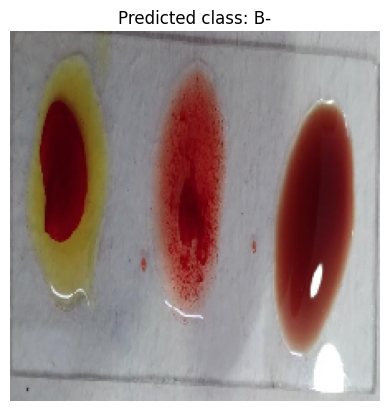

In [22]:
from tensorflow.keras.preprocessing import image

test_image_path = r'D:\Major Project Chandana\Major Project\Blood Sample Based\Blood Dataset\test\B-\B- (7).jpg'
test_image = image.load_img(test_image_path, target_size=(224, 224))  # Resize to match the model's input shape
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)  # Add batch dimension
test_image_array = test_image_array / 255.0  # Normalize to match training data

predictions = model.predict(test_image_array)
predicted_class = np.argmax(predictions, axis=1)

predicted_label = cm_plot_labels[predicted_class[0]]

plt.imshow(test_image)
plt.axis('off')
plt.title(f'Predicted class: {predicted_label}')  # Display the predicted class on the image
plt.show()